# Data Exploration
<p>
    This notebook should contain preliminary data exploration and graphing of the data set.
</p>
<p>
    Last modified 4/14/18 by Kate Baumli
</p>

In [42]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

First load up the data.

In [43]:
filepath = '../data/kaggle-data/'
filename = 'merged_data.csv'
data = pd.read_csv(filepath + filename)
# drop extra index column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [44]:
# Output suppressed
#data.describe()
#data.info()
#data.head()

In [45]:
# Output suppressed, this is to check data was cleaned properly
#print(data.clean_transcripts[0]) 

In [46]:
print('The number of NaN clean transcripts is:\t\t{}'.
      format(data.clean_transcripts.isnull().sum()))
print('The number of NaN original transcripts is:\t{}'.
      format(data.transcript.isnull().sum()))

The number of NaN clean transcripts is:		83
The number of NaN original transcripts is:	83


That is something we need to look into... For the moment I am going to drop them.

In [47]:
# Assuming the NaN are the same rows in both columns
data_trimmed = data.dropna(subset=['clean_transcripts'])

In [48]:
# This loops over all rows in the clean transcripts column and 
# puts every word in every transcript into a list called words
words = []
for row in data_trimmed.itertuples():
    words.extend(row.clean_transcripts.split())
print('Number of words:',len(words))

Number of words: 5097705


In [55]:
# Get counts for each word
word_counts = Counter(words)
print('Number of unique words:',len(word_counts))

# Grab the most common words
most_common = dict()
num_words_desired = 75
for word, word_count in word_counts.most_common(num_words_desired):
    most_common[word] = word_count
print('The',num_words_desired, 'most common words in all TED talk transcripts:\n',list(most_common.keys()))

Number of unique words: 103043
The 75 most common words in all TED talk transcripts:
 ['the', 'and', 'to', 'of', 'a', 'that', 'in', 'i', 'you', 'is', 'we', 'it', 'this', 'so', 'was', 'for', 'are', 'have', 'but', 'they', 'on', 'with', 'its', 'what', '—', 'about', 'can', 'be', 'as', 'at', 'not', 'my', 'all', 'do', 'were', 'if', 'one', 'from', 'people', 'our', 'like', 'or', 'an', 'just', 'these', 'when', 'there', 'because', 'by', 'he', 'how', 'very', 'going', 'more', 'out', 'had', 'their', 'your', 'me', 'thats', 'up', 'them', 'would', 'who', 'think', 'which', 'get', 'really', 'see', 'im', 'now', 'some', 'laughter', 'us', 'has']


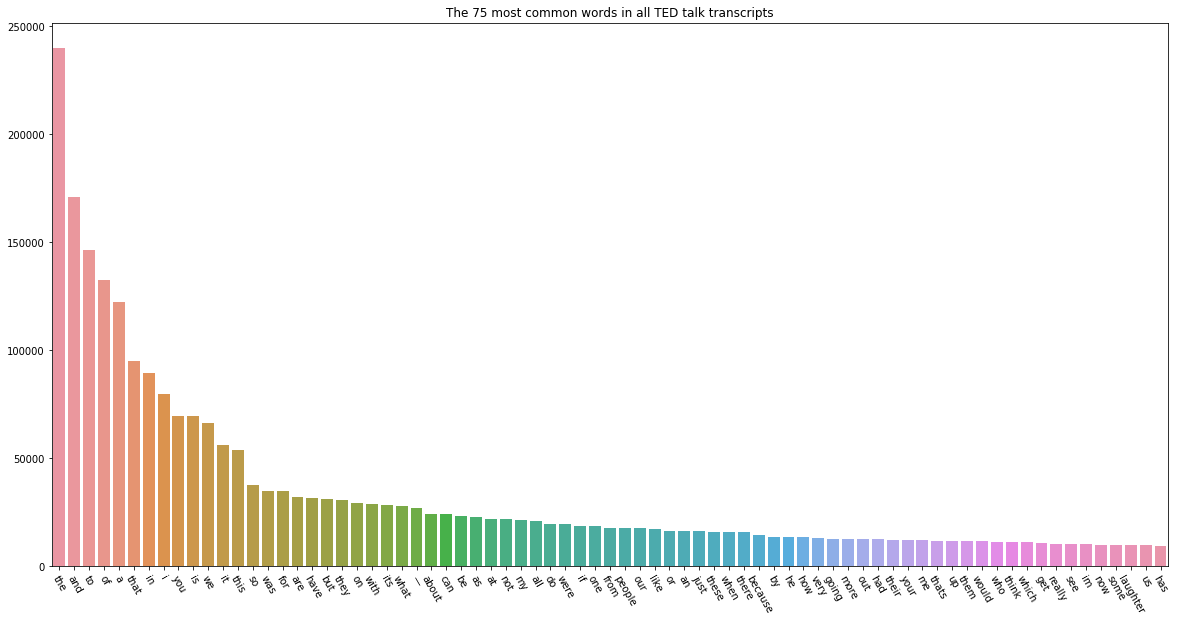

In [56]:
# Plot a histogram
_ = plt.figure(figsize=(20,10))
_ = sns.barplot(list(most_common.keys()), list(most_common.values()))
title = 'The '+str(num_words_desired)+' most common words in all TED talk transcripts'
_ = plt.title(title)
_ = plt.xticks(rotation=300)
plt.show()